# **Transfer Learning**

**Giulia Iannotta**

**Matricola: 2054249**

# **Introduzione**



Il **Transfer Learning** rappresenta un avanzamento significativo nell'ambito dell'**apprendimento automatico**, consentendo di trasferire conoscenze acquisite da un modello su un determinato dataset o task per migliorare le prestazioni su un altro dataset o task correlato.


Sebbene sia maggiormente conosciuto nell'ambito delle **reti neurali profonde**, il **Transfer Learning** può essere applicato con successo anche a **modelli tradizionali**. In questo contesto, i modelli non neurali possono beneficiare del trasferimento di conoscenze, migliorando le loro prestazioni e adattandosi meglio a nuovi domini.




L’obiettivo di questo progetto è **dimostrare l’efficacia del Transfer Learning in modelli non neurali**, con un focus su due approcci diversi:


*   **Regressione Lineare**, utilizzata per valutare come un modello semplice possa essere migliorato sfruttando le conoscenze pregresse.
*   **Random Forest**, che rappresenta un modello più complesso e flessibile, ideale per dimostrare come il Transfer Learning possa ottimizzare le prestazioni anche in algoritmi basati su alberi decisionali.













 **Struttura del Progetto**:
1. **Import**
1.   **Preparazione dei dati**:
  *   Analisi dei dataset climatici relativi a Italia e Giappone;
  *   Preprocessing dei dati.
2. **Regressione Lineare**:
  *   Addestramento del Modello Base
  *   Addrestamento del Modello con Transfer Learning 'Diretto'
  *   Addrestamento del Modello con Transfer Learning 'Fine-tuned'
  *   Modello Riaddestrato
  *   Confronto delle Prestazioni
  *   Vantaggio Cumulativo
3. **Random Forest**:
  *   Addestramento del Modello Base
  *   Addrestamento del Modello con Transfer Learning
  *   Ottimizzazione del Modello con Transfer Learning
  *   Modello Riaddestrato
  *   Confronto delle Prestazioni
  *   Vantaggio Cumulativo
5. **Conclusioni**








# **Import**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# **Transfer Learning tra dataset di Italia e Giappone**

Immaginiamo di voler **analizzare le tendenze climatiche di due Paesi**, come l’**Italia** e il **Giappone**. Entrambi hanno registrato variazioni di temperatura annuali nel corso degli anni, fornendo dati utili per comprendere gli effetti del **cambiamento climatico**. Tuttavia, sebbene questi Paesi siano geograficamente e climaticamente diversi, condividono un elemento comune: i **trend globali** che influenzano l’intero pianeta, come il riscaldamento globale.

In questo scenario, diventa interessante chiedersi: **è possibile sfruttare le conoscenze climatiche apprese da un dataset, come quello italiano, per migliorare le previsioni su un altro dataset, come quello giapponese?** La risposta risiede nell’applicazione del **Transfer Learning**, che consente di trasferire modelli e conoscenze da un contesto all’altro, anche quando esistono differenze locali.

## **Preparazione dei Dati**

I due dataset utilizzati in questa analisi provengono da **FAOSTAT** e contengono variazioni di temperatura annuali registrate tra il **1961** e il **2021**:


* **Dataset Italia**:

 Contiene i dati relativi alle variazioni di temperatura sul territorio italiano. Le temperature sono organizzate su base mensile, con valori espressi in gradi Celsius. Inoltre, i dati includono annotazioni per i valori stimati, evidenziando la qualità delle informazioni raccolte.

In [47]:
# Download e lettura del dataset Italia
italia_data = pd.read_csv('italia_file.csv')
print(italia_data.head())

  Domain Code                      Domain  Area Code (M49)   Area  \
0          ET  Temperature change on land              380  Italy   
1          ET  Temperature change on land              380  Italy   
2          ET  Temperature change on land              380  Italy   
3          ET  Temperature change on land              380  Italy   
4          ET  Temperature change on land              380  Italy   

   Element Code             Element  Months Code   Months  Year Code  Year  \
0          7271  Temperature change         7001  January       1961  1961   
1          7271  Temperature change         7001  January       1962  1962   
2          7271  Temperature change         7001  January       1963  1963   
3          7271  Temperature change         7001  January       1964  1964   
4          7271  Temperature change         7001  January       1965  1965   

  Unit  Value Flag Flag Description  
0   °c -0.260    E  Estimated value  
1   °c  1.409    E  Estimated value  
2 

* **Dataset Giappone**:

 Presenta una struttura analoga al dataset italiano, ma riferita al territorio giapponese. Anche in questo caso, le temperature sono riportate mensilmente e comprendono stime per alcune osservazioni.

In [48]:
# Download e lettura del dataset Giappone
giappone_data = pd.read_csv('giappone_file.csv')
print(giappone_data.head())

  Domain Code                      Domain  Area Code (M49)   Area  \
0          ET  Temperature change on land              392  Japan   
1          ET  Temperature change on land              392  Japan   
2          ET  Temperature change on land              392  Japan   
3          ET  Temperature change on land              392  Japan   
4          ET  Temperature change on land              392  Japan   

   Element Code             Element  Months Code   Months  Year Code  Year  \
0          7271  Temperature change         7001  January       1961  1961   
1          7271  Temperature change         7001  January       1962  1962   
2          7271  Temperature change         7001  January       1963  1963   
3          7271  Temperature change         7001  January       1964  1964   
4          7271  Temperature change         7001  January       1965  1965   

  Unit  Value Flag Flag Description  
0   °c -0.978    E  Estimated value  
1   °c -0.086    E  Estimated value  
2 

In [49]:
# Controllo valori nulli
print(italia_data.isnull().sum())
print(giappone_data.isnull().sum())

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Months Code         0
Months              0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64
Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Months Code         0
Months              0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64


In [50]:
# controllo quali colonne ci sono in ciascun dataset per capire cosa utilizzare
print(italia_data.columns)
print(giappone_data.columns)

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Months Code', 'Months', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')
Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Months Code', 'Months', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')


Per l'analisi condotta in questo progetto, i dataset originali sono stati filtrati per includere **solo le colonne relative all'anno e al valore delle variazioni di temperatura**. Questa scelta metodologica è dettata dall'obiettivo di **semplificare** l'analisi e **focalizzarla** sugli elementi essenziali per lo studio delle tendenze climatiche e del Transfer Learning.

In [14]:
italia_filtered = italia_data[['Year', 'Value']]
giappone_filtered = giappone_data[['Year', 'Value']]

Un altro punto importante della preparazione dei dati è rappresentata dall'aggregazione delle informazioni su base annuale. I dati originali, forniti su base mensile, sono stati trasformati calcolando le **medie annuali delle variazioni di temperatura**.

Lavorare con medie annuali permette di ridurre il rumore presente nei dati mensili e di evidenziare i **pattern climatici** più rilevanti. Inoltre, questa scelta semplifica il confronto tra i dataset di Italia e Giappone garantendo una rappresentazione uniforme e coerente delle informazioni.

In [51]:
italia_annual_avg = italia_filtered.groupby(['Year'])['Value'].mean().reset_index()
giappone_annual_avg = giappone_filtered.groupby(['Year'])['Value'].mean().reset_index()

italia_annual_avg.columns = ['Anno', 'Andamento della Temperatura (Italia)']
giappone_annual_avg.columns = ['Anno', 'Andamento della Temperatura (Giappone)']

italia_annual_avg.head(), giappone_annual_avg.head()

(   Anno  Andamento della Temperatura (Italia)
 0  1961                              0.782353
 1  1962                             -0.082529
 2  1963                             -0.234471
 3  1964                              0.158529
 4  1965                             -0.371235,
    Anno  Andamento della Temperatura (Giappone)
 0  1961                                0.723588
 1  1962                                0.134118
 2  1963                               -0.030118
 3  1964                                0.202882
 4  1965                               -0.555765)

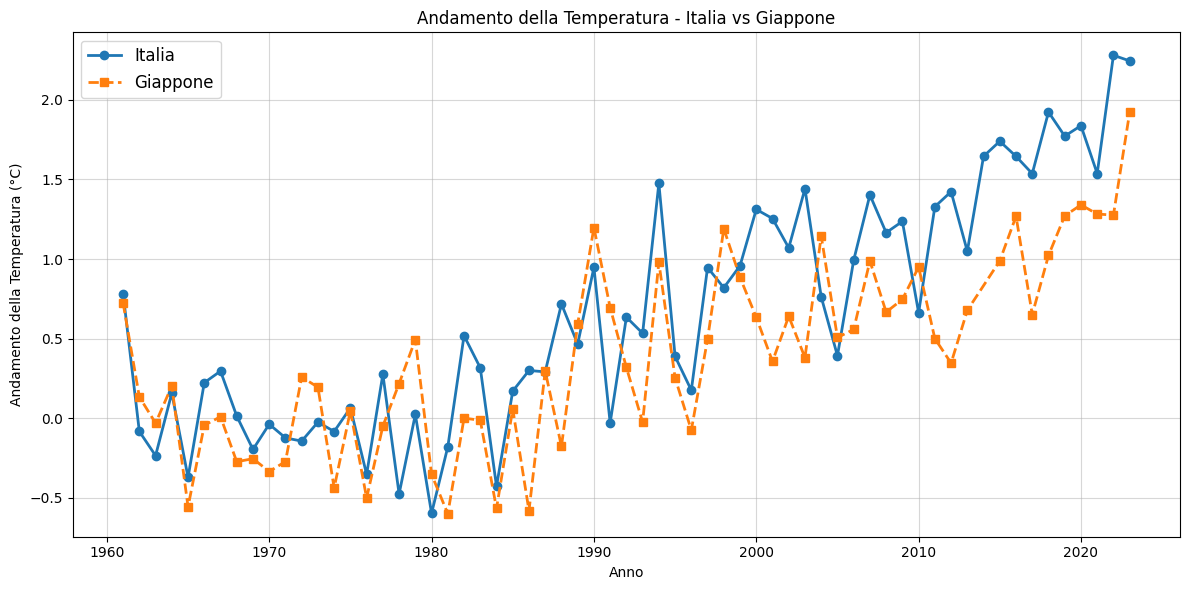

In [16]:
# Grafico dell'Andamento dell Temperatura - Italia vs GIappone
plt.figure(figsize=(12, 6))
plt.plot(italia_annual_avg['Anno'], italia_annual_avg['Andamento della Temperatura (Italia)'], label='Italia', marker='o', linestyle='-', linewidth=2)
plt.plot(giappone_annual_avg['Anno'], giappone_annual_avg['Andamento della Temperatura (Giappone)'], label='Giappone', marker='s', linestyle='--', linewidth=2)

plt.xlabel('Anno')
plt.ylabel('Andamento della Temperatura (°C)')
plt.title('Andamento della Temperatura - Italia vs Giappone')
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

Dal grafico si nota una tendenza generale al riscaldamento globale per entrambi i Paesi, con un incremento visibile soprattutto dagli anni ’90 in poi. Nonostante le somiglianze nei trend globali, emergono alcune **differenze significative**: i dati giapponesi presentano una maggiore variabilità locale, con oscillazioni più marcate, mentre i dati italiani mostrano un andamento più regolare.

Pertanto, appare plausibile applicare il Transfer Learning in questo contesto, integrando però **modifiche mirate** per garantire che il modello si adatti efficacemente alle eterogeneità e alle peculiarità dei singoli dataset.

## **Regressione Lineare**

Il primo passo consiste nel preparare i dati relativi all'Italia.

I dati annuali sono suddivisi in due componenti principali:
* l'anno (**Anno**) come variabile indipendente
* il cambiamento della temperatura (**Andamento della Temperatura (Italia)**) come variabile dipendente.

In [17]:
X_italia = italia_annual_avg[['Anno']]
y_italia = italia_annual_avg['Andamento della Temperatura (Italia)']

La normalizzazione viene applicata per rendere la scala dei dati uniforme, migliorando così l'efficienza e la stabilità del modello.

In [18]:
scaler = StandardScaler()
X_italia = scaler.fit_transform(X_italia)

Infine, i dati vengono divisi in un set di addestramento e uno di test, per garantire una valutazione obiettiva delle prestazioni.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_italia, y_italia, test_size=0.2, random_state=42)



---



**Modello Base Italia**

Dopo la preparazione dei dati, viene addestrato un modello di **Regressione Lineare** utilizzando il set di addestramento italiano. Questo rappresenta il **modello sorgente** che verrà utilizzato come base per il transfer learning.

Le prestazioni del modello vengono quindi valutate sul set di test, calcolando il **Mean Squared Error** (**MSE**) e il **R-squared** (**R²**). Questi indicatori ci permettono di capire quanto bene il modello si adatta ai dati italiani e forniscono una base per confrontarlo con le prestazioni future.

Modello Italia:
Mean Squared Error (MSE): 0.21512593339492286
R-squared (R2): 0.6008428001923598


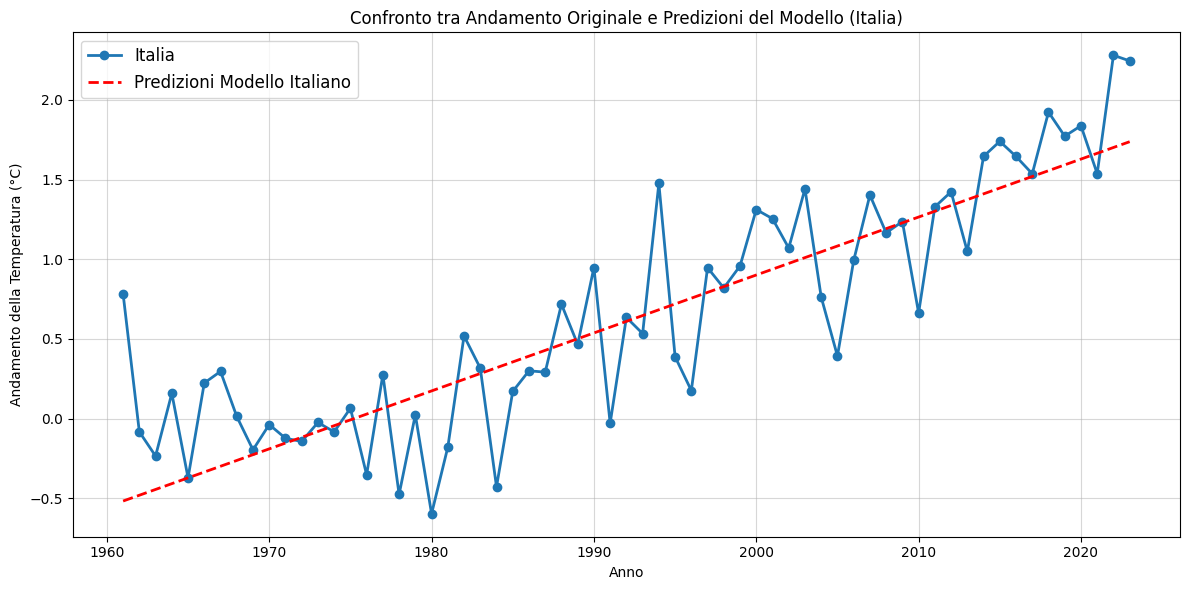

In [20]:
model_italia = LinearRegression()
model_italia.fit(X_train, y_train)

# Valutazione Modello Italia
coeff_italia = model_italia.coef_
intercept_italia = model_italia.intercept_
y_pred_italia = model_italia.predict(X_test)
mse_italia = mean_squared_error(y_test, y_pred_italia)
r2_italia = r2_score(y_test, y_pred_italia)

print('Modello Italia:')
print('Mean Squared Error (MSE):', mse_italia)
print('R-squared (R2):', r2_italia)

# Visualizzazione grafica
plt.figure(figsize=(12, 6))
plt.plot(italia_annual_avg['Anno'], italia_annual_avg['Andamento della Temperatura (Italia)'], label='Italia', marker='o', linestyle='-', linewidth=2)
X_italia_all = scaler.transform(italia_annual_avg[['Anno']])  # Trasforma tutto il dataset
y_pred_italia_all = model_italia.predict(X_italia_all)
plt.plot(italia_annual_avg['Anno'], y_pred_italia_all, label='Predizioni Modello Italiano', color='red', linestyle='--', linewidth=2)

plt.xlabel('Anno')
plt.ylabel('Andamento della Temperatura (°C)')
plt.title('Confronto tra Andamento Originale e Predizioni del Modello (Italia)')
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

**Il modello ha prodotto un MSE di 0.2151 e un R² di 0.6008.**

Questo risultato indica che il modello riesce a spiegare circa il 60% della variabilità nelle variazioni di temperatura, con un errore medio di circa
±0.46 °C.

Questo risultato è in linea con le aspettative: **non ci aspettiamo una rappresentazione perfetta delle dinamiche climatiche**, ma il suo scopo principale è fornire una **base solida** da cui partire per esplorare le potenzialità del Transfer Learning.





---



**Modello con Transfer Learning 'Diretto'**

Dopo aver costruito un modello predittivo basato sui dati italiani, il passo successivo è mettere alla prova il Transfer Learning applicandolo ai dati climatici giapponesi.

Un primo modo, forse il più banale che ci potrebbe venire in mente, è quello di **utilizzare direttamente il modello pre-addestrato sui dati italiani per fare predizioni sui dati giapponesi**, senza alcun riaddestramento. Questo approccio, pur essendo molto semplice, ci permette di valutare se le conoscenze apprese dai dati italiani sono abbastanza generali da funzionare anche in un contesto completamente diverso.


Transfer Learning Diretto:
Mean Squared Error (MSE): 0.2452357093545214
R-squared (R2): 0.2692486341843042


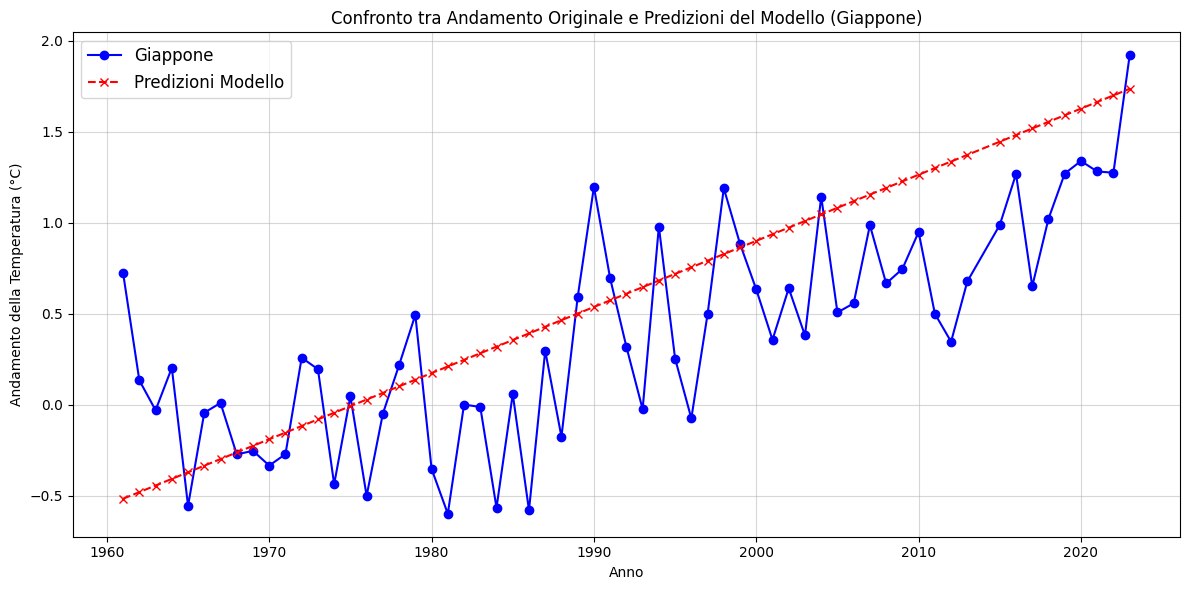

In [22]:
# Dati Giappone
X_giappone = giappone_annual_avg[['Anno']]
y_giappone = giappone_annual_avg['Andamento della Temperatura (Giappone)']

# Normalizzazione dei dati giapponesi utilizzando lo scaler dei dati italiani
X_giappone = scaler.transform(X_giappone)

# Predizioni dirette del modello pre-addestrato sui dati giapponesi
y_pred_tl_d = model_italia.predict(X_giappone)
mse_tl_d = mean_squared_error(y_giappone, y_pred_tl_d)
r2_tl_d = r2_score(y_giappone, y_pred_tl_d)

print('\nTransfer Learning Diretto:')
print('Mean Squared Error (MSE):', mse_tl_d)
print('R-squared (R2):', r2_tl_d)

# Visualizzazione grafica
plt.figure(figsize=(12, 6))
plt.plot(giappone_annual_avg['Anno'], giappone_annual_avg['Andamento della Temperatura (Giappone)'], label='Giappone', marker='o', linestyle='-', color='blue')
plt.plot(giappone_annual_avg['Anno'], y_pred_tl_d, label='Predizioni Modello', marker='x', linestyle='--', color='red')
plt.xlabel('Anno')
plt.ylabel('Andamento della Temperatura (°C)')
plt.title('Confronto tra Andamento Originale e Predizioni del Modello (Giappone)')
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

**Il modello ha prodotto un MSE di 0.2452 e un R² di 0.2692.**

Il MSE indica che, in media, il modello commette errori quadrati pari a 0.2452 nelle sue previsioni rispetto ai valori reali.
L'R² di 0.2692 mostra che il modello riesce a spiegare solo circa il 27% delle variazioni nei dati giapponesi.

In altre parole, **il modello italiano non è molto efficace per descrivere i dati giapponesi**. Questo accade perchè, come abbiamo visto durante l'analisi dei dataset, i dati italiani e giapponesi, pur avendo alcune somiglianze, possono differire in fattori specifici come il ritmo del cambiamento o le dinamiche regionali.



---



**Modello con Transfer Learning 'Fine-tuned'**

Il passo successivo nel nostro progetto è quello di adattare il modello italiano ai dati giapponesi attraverso un fine-tuning basato sui residui. L’idea è semplice ma efficace: **prendiamo le differenze (i residui) tra i valori reali giapponesi e le predizioni fatte dal modello italiano, e le utilizziamo per costruire una correzione mirata**. Questo permette al modello di affinare le sue predizioni, tenendo conto delle peculiarità dei dati giapponesi.

In pratica, i residui ci mostrano dove il modello pre-addestrato n**on riesce a catturare completamente i pattern dei nuovi dati**. Modellandoli separatamente, riusciamo a ridurre queste discrepanze e a migliorare l’adattamento del modello, combinando il meglio di ciò che è stato appreso dai dati italiani con una correzione mirata ai dati giapponesi.


Transfer Learning Fine-Tuned:
Mean Squared Error (MSE): 0.150495359036221
R-squared (R2): 0.5515551570605132


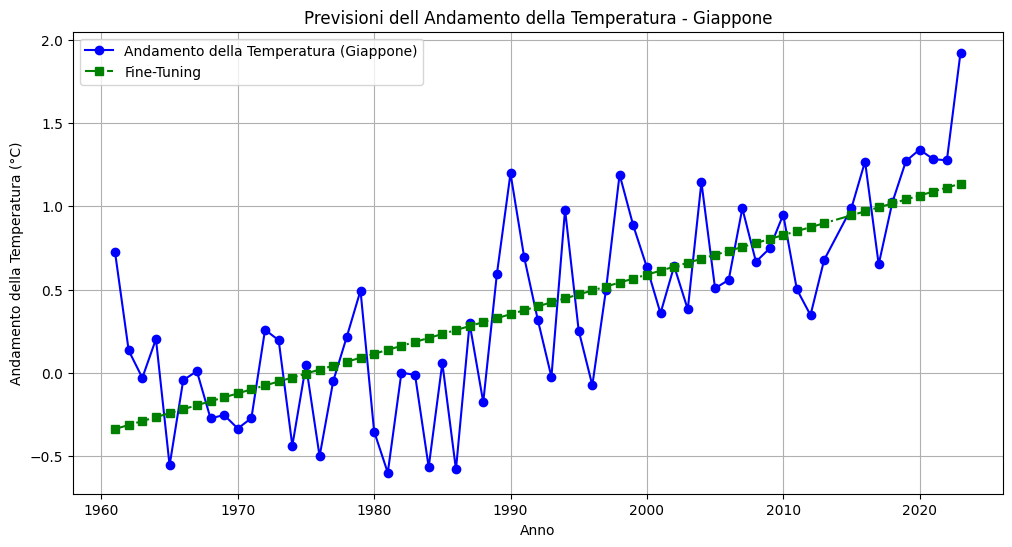

In [40]:
y_pred_base = model_italia.predict(X_giappone)
residui_giappone = y_giappone - y_pred_base

model_finetune = LinearRegression()
model_finetune.fit(X_giappone, residui_giappone)

y_pred_fine_tune = y_pred_base + model_finetune.predict(X_giappone)
mse_fine_tune = mean_squared_error(y_giappone, y_pred_fine_tune)
r2_fine_tune = r2_score(y_giappone, y_pred_fine_tune)

print('\nTransfer Learning Fine-Tuned:')
print('Mean Squared Error (MSE):', mse_fine_tune)
print('R-squared (R2):', r2_fine_tune)

# Visualizza i risultati
plt.figure(figsize=(12, 6))
plt.plot(giappone_annual_avg['Anno'], y_giappone, label='Andamento della Temperatura (Giappone)', marker='o', linestyle='-', color='blue')
plt.plot(giappone_annual_avg['Anno'][y_giappone.index], y_pred_fine_tune, label='Fine-Tuning', marker='s', linestyle='-.', color='green')
plt.xlabel('Anno')
plt.ylabel('Andamento della Temperatura (\u00b0C)')
plt.title('Previsioni dell Andamento della Temperatura - Giappone')
plt.legend()
plt.grid(True)
plt.show()

**Il modello ha prodotto un MSE di 0.1505 e un R² di 0.5516**

Rispetto all'Adattamento Diretto, notiamo un **netto miglioramento**: l'errore medio nelle predizioni si è ridotto in modo significativo, segno che il modello fine-tuned riesce a fare previsioni più precise sui dati giapponesi. Inoltre, il fatto che il modello riesca a spiegare circa il **55% della variabilità** nei dati target rappresenta un passo avanti importante rispetto al 27% ottenuto con il semplice adattamento diretto.

Questo risultato dimostra che il fine-tuning ha permesso al modello di **correggere gli errori sistematici delle predizioni iniziali**, adattandosi meglio alle peculiarità dei dati giapponesi. È una chiara dimostrazione del potenziale del transfer learning quando combinato con un meccanismo di affinamento mirato.



---



**Modello Riaddestrato**

Per misurare in modo più chiaro le prestazioni del transfer learning, è stato pensato di riaddestrare completamente un modello utilizzando solo i dati giapponesi. Questo approccio può fungere da **baseline**, fornendo un punto di riferimento per valutare **quanto il trasferimento delle conoscenze apprese sui dati italiani contribuisca effettivamente a migliorare le predizioni**.


Modello Riaddestrato:
Mean Squared Error (MSE): 0.150495359036221
R-squared (R2): 0.5515551570605132


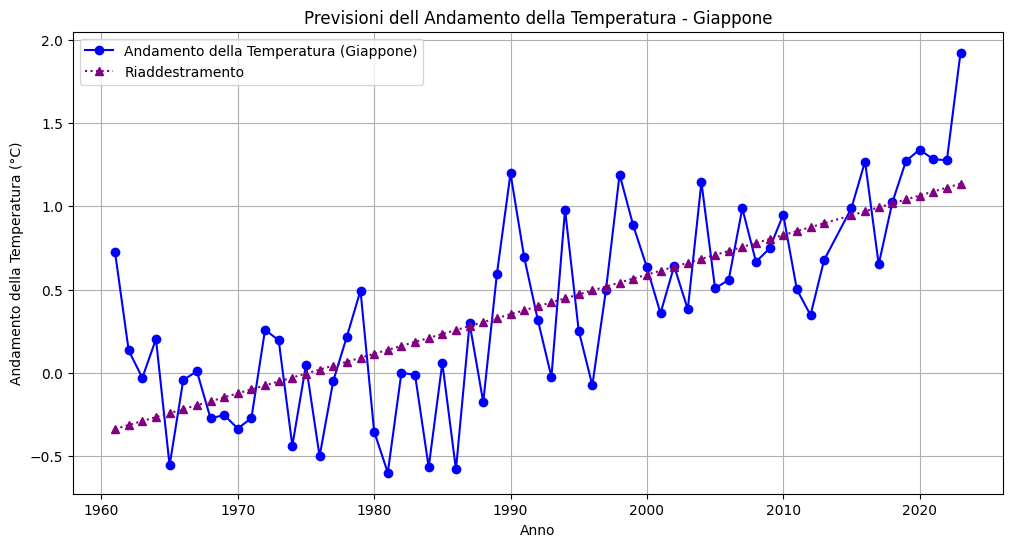

In [24]:
model_retrained = LinearRegression()
model_retrained.fit(X_giappone, y_giappone)

y_pred_retrained = model_retrained.predict(X_giappone)
mse_retrained = mean_squared_error(y_giappone, y_pred_retrained)
r2_retrained = r2_score(y_giappone, y_pred_retrained)

print('\nModello Riaddestrato:')
print('Mean Squared Error (MSE):', mse_retrained)
print('R-squared (R2):', r2_retrained)

plt.figure(figsize=(12, 6))
plt.plot(giappone_annual_avg['Anno'], y_giappone, label='Andamento della Temperatura (Giappone)', marker='o', linestyle='-', color='blue')
plt.plot(giappone_annual_avg['Anno'][y_giappone.index], y_pred_retrained, label='Riaddestramento', marker='^', linestyle=':', color='purple')
plt.xlabel('Anno')
plt.ylabel('Andamento della Temperatura (°C)')
plt.title('Previsioni dell Andamento della Temperatura - Giappone')
plt.legend()
plt.grid(True)
plt.show()

**Confronto delle Prestazioni**




Confronto delle Metriche:
                     Model       MSE        R2
0    Trasferimento diretto  0.245236  0.269249
1  Adattamento dei residui  0.150495  0.551555
2             Riaddestrato  0.022051  0.934294


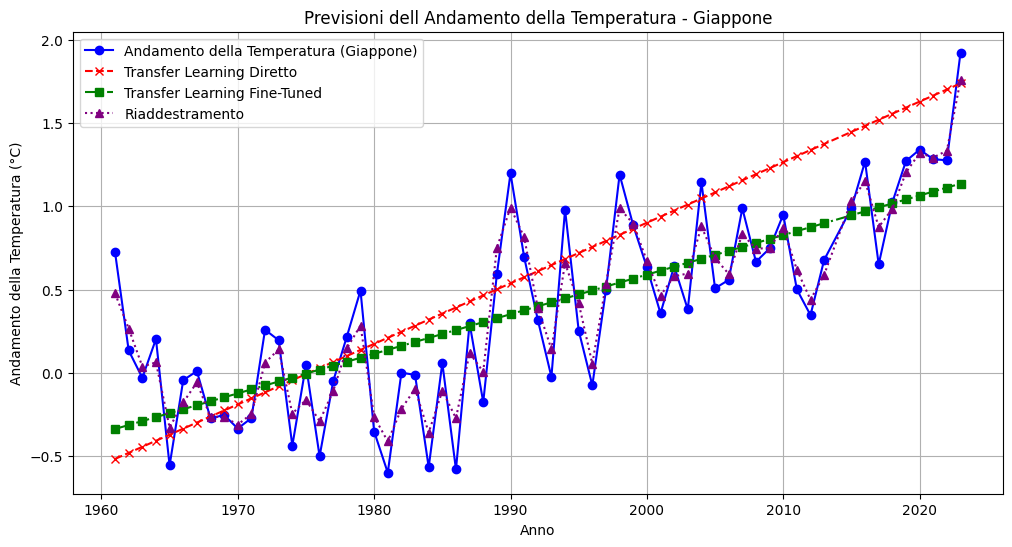

In [41]:
# Grafici a confronto
results = pd.DataFrame({
    'Model': ['Trasferimento diretto', 'Adattamento dei residui', 'Riaddestrato'],
    'MSE': [mse_tl_d, mse_fine_tune, mse_retrained],
    'R2': [r2_tl_d, r2_fine_tune, r2_retrained]
})
print('\nConfronto delle Metriche:')
print(results)

plt.figure(figsize=(12, 6))
plt.plot(giappone_annual_avg['Anno'], y_giappone, label='Andamento della Temperatura (Giappone)', marker='o', linestyle='-', color='blue')
plt.plot(giappone_annual_avg['Anno'][y_giappone.index], y_pred_tl_d, label='Transfer Learning Diretto', marker='x', linestyle='--', color='red')
plt.plot(giappone_annual_avg['Anno'][y_giappone.index], y_pred_fine_tune, label='Transfer Learning Fine-Tuned', marker='s', linestyle='-.', color='green')
plt.plot(giappone_annual_avg['Anno'][y_giappone.index], y_pred_retrained, label='Riaddestramento', marker='^', linestyle=':', color='purple')
plt.xlabel('Anno')
plt.ylabel('Andamento della Temperatura (°C)')
plt.title('Previsioni dell Andamento della Temperatura - Giappone')
plt.legend()
plt.grid(True)
plt.show()

I risultati ci raccontano **una storia chiara sull’efficacia del Transfer Learning**. L'approccio più semplice, quello del trasferimento diretto, dimostra che non è sufficiente applicare un modello pre-addestrato su un dataset diverso senza adattamenti. D'altra parte, il fine-tuning con adattamento dei residui brilla per efficacia, mostrando che **sfruttare le conoscenze pregresse e affinarle sui nuovi dati è una strategia vincente**. Interessante notare come questo metodo raggiunga le stesse prestazioni di un modello riaddestrato da zero, ma con il vantaggio di utilizzare al meglio il lavoro già fatto sui dati italiani.

**Vantaggio Cumulativo**

Il calcolo del vantaggio cumulativo è un passaggio cruciale per misurare e quantificare l'efficacia del transfer learning rispetto all'approccio tradizionale. In questo caso, con la **Regressione Lineare**, il vantaggio cumulativo ci dice **quanto meglio performa il modello che sfrutta il fine-tuning rispetto a quello usato direttamente**. In pratica, mettiamo a confronto gli errori (MSE) dei due modelli: se il vantaggio è **positivo**, significa che il transfer learning sta davvero portando un **valore aggiunto**.

L’implementazione del calcolo richiede la suddivisione dei dati del dominio di destinazione in sottoinsiemi di dimensioni crescenti. Per ciascun sottoinsieme, vengono calcolate le previsioni e gli errori associati sia al modello trasferito sia a quello affinato. La differenza tra gli MSE fornisce il vantaggio cumulativo.

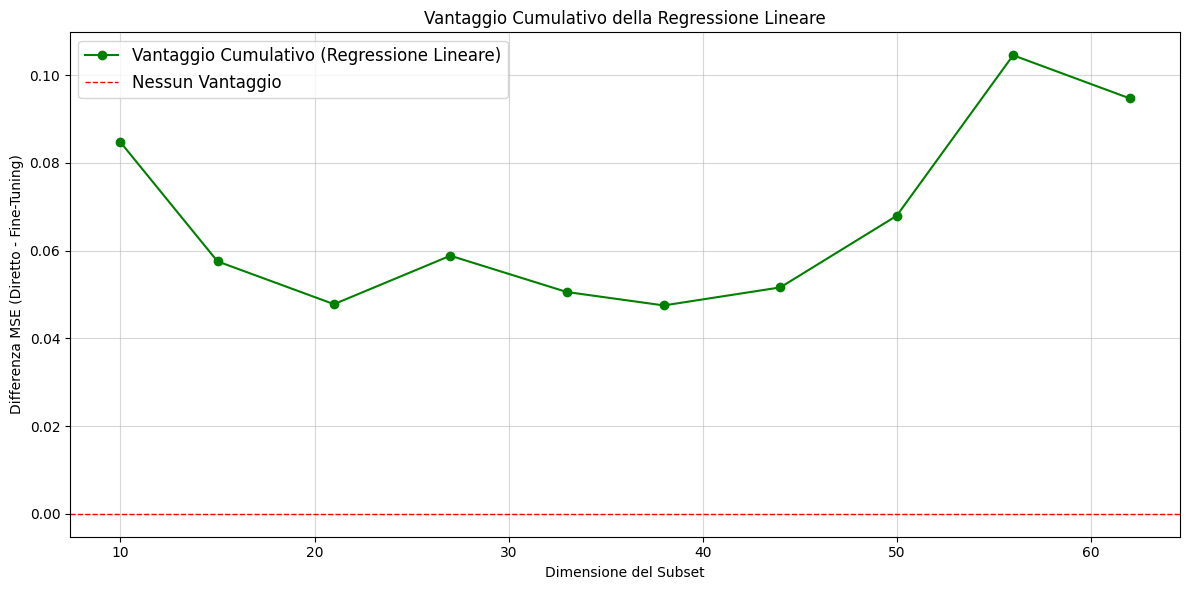

In [42]:
subset_sizes = np.linspace(10, len(X_giappone), num=10, dtype=int)
mse_direct_lr_subsets = []
mse_fine_tune_lr_subsets = []

for size in subset_sizes:
    X_subset = X_giappone[:size]
    y_subset = y_giappone[:size]

    y_pred_direct_subset = model_italia.predict(X_subset)
    mse_direct_lr_subsets.append(mean_squared_error(y_subset, y_pred_direct_subset))

    y_pred_fine_tune_subset = y_pred_direct_subset + model_finetune.predict(X_subset)
    mse_fine_tune_lr_subsets.append(mean_squared_error(y_subset, y_pred_fine_tune_subset))

cumulative_advantage_lr = np.array(mse_direct_lr_subsets) - np.array(mse_fine_tune_lr_subsets)


plt.figure(figsize=(12, 6))
plt.plot(subset_sizes, cumulative_advantage_lr, marker='o', linestyle='-', color='green', label='Vantaggio Cumulativo (Regressione Lineare)')
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Nessun Vantaggio')
plt.xlabel('Dimensione del Subset')
plt.ylabel('Differenza MSE (Diretto - Fine-Tuning)')
plt.title('Vantaggio Cumulativo della Regressione Lineare')
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

Come anticipato, il grafico del **vantaggio cumulativo** ci offre una visione chiara dell'efficacia del **Transfer Learning**. Mostra come il **fine-tuning**, come metodo per sfruttare il transfer learning, **garantisca prestazioni superiori**, soprattutto quando i dati disponibili sono pochi. Questo evidenzia che il transfer learning non solo utilizza al meglio le conoscenze pregresse, ma consente anche di ottenere risultati eccellenti senza dover ripartire da zero.

Con l’aumentare della dimensione del dataset, il vantaggio tende a diminuire, indicando che con dati abbondanti entrambi gli approcci possono diventare simili.

Tuttavia, questa analisi conferma che il **Transfer Learning è una strategia efficace per risparmiare tempo e risorse**, mantenendo prestazioni predittive elevate.

## Random Forest

Passiamo ora a un modello più avanzato: il **Random Forest Regressor**.

Rispetto alla regressione lineare, la Random Forest presenta una maggiore complessità e una minore flessibilità nel trasferire le conoscenze. In questa sezione esploreremo come adattare questo modello al contesto del **Transfer Learning** e affrontare le sfide che ne derivano.



In [27]:
# Preparazione dei dati e Normalizzazione
X_italia = italia_annual_avg[['Anno']]
y_italia = italia_annual_avg['Andamento della Temperatura (Italia)']
X_giappone = giappone_annual_avg[['Anno']]
y_giappone = giappone_annual_avg['Andamento della Temperatura (Giappone)']

scaler = StandardScaler()
X_italia = scaler.fit_transform(X_italia)
X_giappone = scaler.transform(X_giappone)



---



**Modello Base Italia**

Come primo passo, proprio come fatto nella sezione precedente, addestriamo un modello di **Random Forest** utilizzando i dati italiani. Questo modello fungerà da punto di partenza, o **modello sorgente**, per implementare il **transfer learning** sui dati giapponesi.

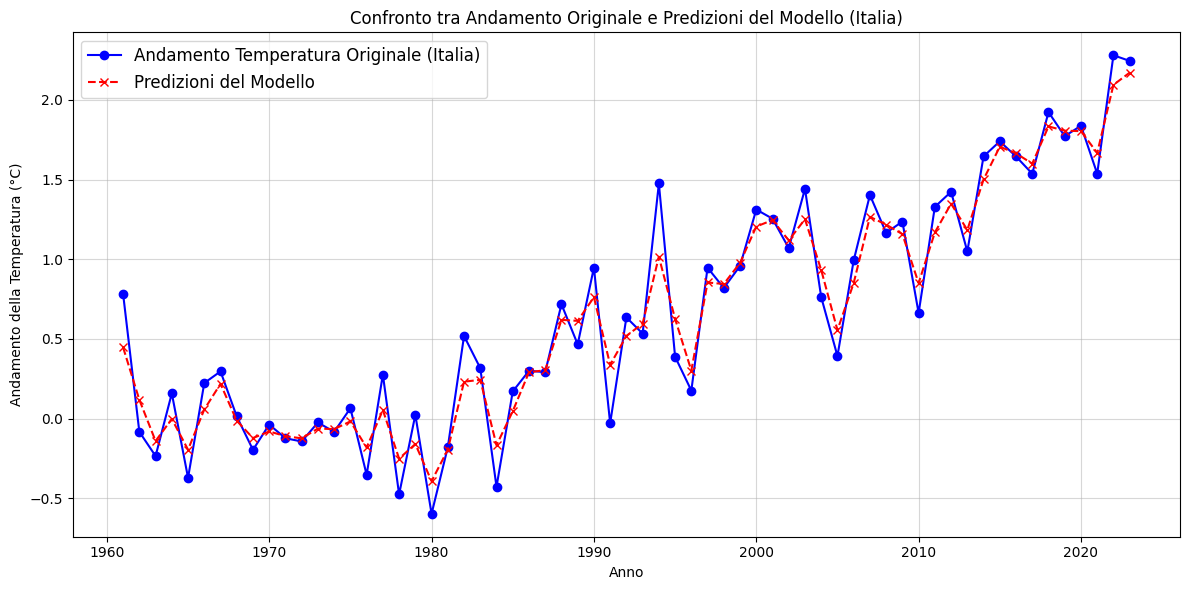

In [28]:
model_italia_rf = RandomForestRegressor(random_state=42)
model_italia_rf.fit(X_italia, y_italia)

y_pred = model_italia_rf.predict(X_italia)

plt.figure(figsize=(12, 6))
plt.plot(italia_annual_avg['Anno'], italia_annual_avg['Andamento della Temperatura (Italia)'], label='Andamento Temperatura Originale (Italia)', marker='o', linestyle='-', color='blue')
plt.plot(italia_annual_avg['Anno'], y_pred, label='Predizioni del Modello', marker='x', linestyle='--', color='red')
plt.xlabel('Anno')
plt.ylabel('Andamento della Temperatura (°C)')
plt.title('Confronto tra Andamento Originale e Predizioni del Modello (Italia)')
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()



---



**Modello con Transfer Learning 'Diretto'**




Una prima idea, simile a quanto già fatto in precedenza con la regressione lineare, potrebbe essere quella di **prendere il modello addestrato sui dati italiani e riaddestrarlo sui dati giapponesi**, adattandolo al nuovo dominio. Questo approccio sfrutta la conoscenza già acquisita dal modello e aggiunge informazioni specifiche al nuovo dataset, seguendo un processo già sperimentato.

Tuttavia, proprio come si è visto con la regressione lineare, questo metodo presenta delle **limitazioni**.


Adattamento Diretto:
MSE: 0.2068953082984596
R²: 0.38349504842545357


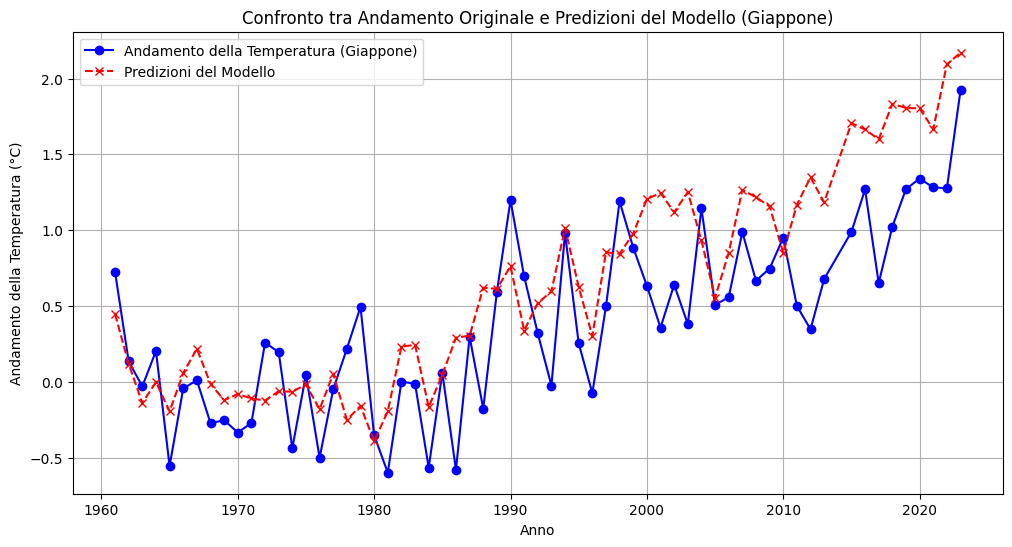

In [43]:
y_pred_direct = model_italia_rf.predict(X_giappone)
mse_direct = mean_squared_error(y_giappone, y_pred_direct)
r2_direct = r2_score(y_giappone, y_pred_direct)

print("\nAdattamento Diretto:")
print("MSE:", mse_direct)
print("R²:", r2_direct)

plt.figure(figsize=(12, 6))
plt.plot(giappone_annual_avg['Anno'], y_giappone, label='Andamento della Temperatura (Giappone)', marker='o', linestyle='-', color='blue')
plt.plot(giappone_annual_avg['Anno'], y_pred_direct, label='Predizioni del Modello', marker='x', linestyle='--', color='red')
plt.xlabel('Anno')
plt.ylabel('Andamento della Temperatura (°C)')
plt.title('Confronto tra Andamento Originale e Predizioni del Modello (Giappone)')
plt.legend()
plt.grid(True)
plt.show()

**Il modello ha prodotto un MSE di 0.2068 e un R² di 0.3834.**

Come era prevedibile, **il modello italiano non è molto efficace per descrivere i dati giapponesi**.
La motivazione risulta sempre la stessa: **i dati italiani e giapponesi, pur avendo alcune somiglianze, possono differire in fattori specifici.**



---



**Modello con Transfer Learning**

Una seconda idea che potrebbe venirci in mente è utilizzare un approccio di fine-tuning simile a quello usato per la Regressione Lineare. Tuttavia, nel caso della Random Forest, **non possiamo lavorare sui residui in modo diretto** e, di conseguenza, non possiamo applicare un fine-tuning nel senso stretto.

Dunque, per ovviare a questo problema, è stato utilizzato un tipo di transfer learning in cui riutilizziamo direttamente alcuni alberi già addestrati (dal modello sui dati italiani) per costruire un nuovo modello per il task giapponese, adattandolo ai nuovi dati. In altre parole, stiamo usando un **riutilizzo di conoscenze**.

In [30]:
class TransferLearningRandomForest:
    def __init__(self, base_forest, additional_trees=0, random_state=42):
        self.base_forest = base_forest
        self.additional_trees = additional_trees
        self.random_state = random_state
        self.new_forest = None

    def fit(self, X, y):
        # Copia gli alberi esistenti dal modello sorgente
        existing_trees = self.base_forest.estimators_

        # Costruisce nuovi alberi per adattarsi ai dati target
        new_trees = [
            DecisionTreeRegressor(random_state=self.random_state + i).fit(X, y)
            for i in range(self.additional_trees)
        ]

        # Combina gli alberi esistenti con quelli nuovi
        all_trees = existing_trees + new_trees

        # Crea una nuova Random Forest con gli alberi combinati
        self.new_forest = RandomForestRegressor(
            n_estimators=len(all_trees),
            random_state=self.random_state
        )
        self.new_forest.estimators_ = all_trees
        self.new_forest.n_features_in_ = X.shape[1]
        self.new_forest.n_outputs_ = 1

    def predict(self, X):
        if self.new_forest is None:
            raise ValueError("Il modello non è stato ancora addestrato. Chiama fit() prima di predict().")
        return self.new_forest.predict(X)

transfer_rf = TransferLearningRandomForest(base_forest=model_italia_rf, additional_trees=20, random_state=42)
transfer_rf.fit(X_giappone, y_giappone)

y_pred_transfer = transfer_rf.predict(X_giappone)
mse_transfer = mean_squared_error(y_giappone, y_pred_transfer)
r2_transfer = r2_score(y_giappone, y_pred_transfer)

print("Transfer Learning - MSE:", mse_transfer)
print("Transfer Learning - R²:", r2_transfer)

Transfer Learning - MSE: 0.1436772974294857
Transfer Learning - R²: 0.5718715614065653


**Il modello ha prodotto un MSE di 0.1436 e un R² di 0.5718.**

Anche in questo caso, il miglioramento ottenuto rispetto all’Adattamento Diretto è visibile, ma **meno significativo** rispetto a quanto osservato nella sezione precedente con la regressione lineare. Questo suggerisce che il semplice riutilizzo degli alberi **non sia ancora sufficiente** per ottenere il massimo potenziale dal transfer learning in questo contesto.

Per migliorare la situazione, è possibile **ottimizzare** ulteriormente il modello utilizzando una ricerca accurata degli **iperparametri** attraverso **GridSearchCV**. Questo approccio consente di esplorare diverse configurazioni per il modello di Random Forest, identificando quella che **massimizza le prestazioni** sul dataset giapponese. La griglia di iperparametri include **il numero di alberi**, **la profondità massima**, il **numero minimo di campioni per split e foglia**, e **il numero di caratteristiche utilizzate per ogni split**, offrendo così un’ampia gamma di combinazioni.

In [52]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Numero di alberi
    'max_depth': [None, 10, 20],    # Profondità massima
    'min_samples_split': [2, 5, 10], # Numero minimo di campioni per split
    'min_samples_leaf': [1, 2, 4],  # Numero minimo di campioni per foglia
    'max_features': ['sqrt', 'log2', None]  # Corretto: 'auto' non è supportato
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_squared_error',  # MSE come metrica di valutazione
    verbose=2,  # Mostra i progressi
    n_jobs=-1    # Usa tutti i core disponibili
)

grid_search.fit(X_giappone, y_giappone)

best_params = grid_search.best_params_
best_model_rf = grid_search.best_estimator_

y_pred_optimized = best_model_rf.predict(X_giappone)
mse_optimized = mean_squared_error(y_giappone, y_pred_optimized)
r2_optimized = r2_score(y_giappone, y_pred_optimized)

print("Migliori Parametri:", best_params)
print("MSE del modello ottimizzato:", mse_optimized)
print("R² del modello ottimizzato:", r2_optimized)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Migliori Parametri: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
MSE del modello ottimizzato: 0.06103978438169842
R² del modello ottimizzato: 0.8181141485331598


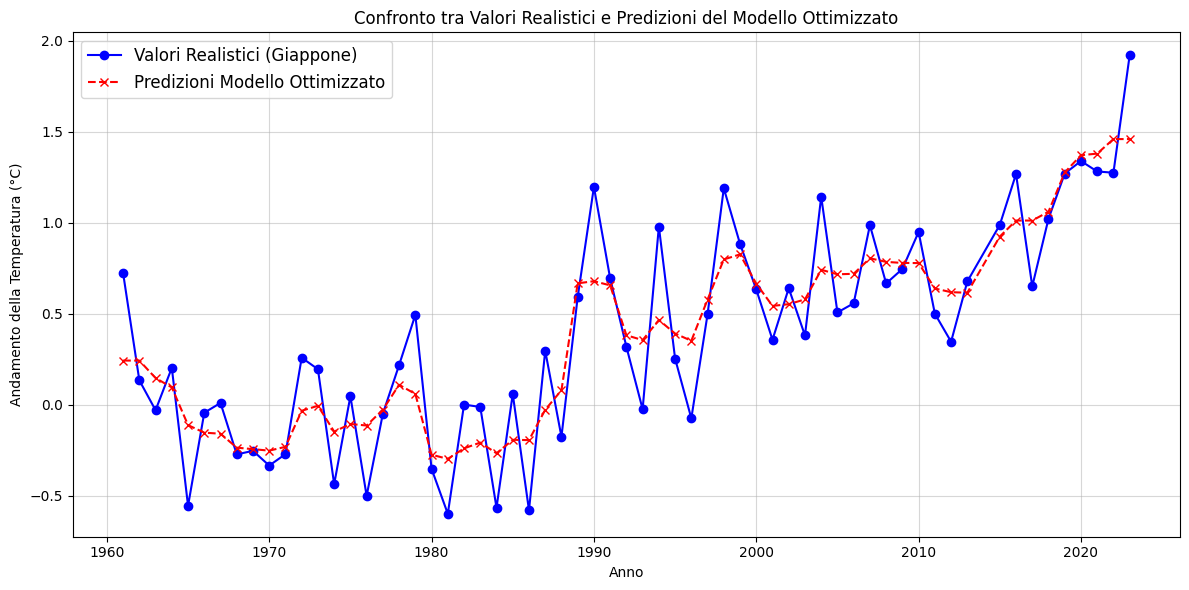

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(giappone_annual_avg['Anno'], y_giappone, label='Valori Realistici (Giappone)', marker='o', linestyle='-', color='blue')
plt.plot(giappone_annual_avg['Anno'], y_pred_optimized, label='Predizioni Modello Ottimizzato', marker='x', linestyle='--', color='red')
plt.xlabel('Anno')
plt.ylabel('Andamento della Temperatura (°C)')
plt.title('Confronto tra Valori Realistici e Predizioni del Modello Ottimizzato')
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

**Il modello ha prodotto un MSE di 0.0610 e un R² di 0.8181.**


I risultati confermano il **miglioramento** con l’ottimizzazione effettuata tramite **GridSearchCV** e una **validazione incrociata a tre fold**.



---



**Modello Riaddestrato**

Per valutare in modo più chiaro le prestazioni del Transfer Learning, come già fatto in precedenza, è stato deciso di riaddestrare completamente un modello utilizzando esclusivamente i dati giapponesi.

In [54]:
model_retrained_rf = RandomForestRegressor(random_state=42, n_estimators=70)
model_retrained_rf.fit(X_giappone, y_giappone)
y_pred_retrained = model_retrained_rf.predict(X_giappone)
mse_retrained = mean_squared_error(y_giappone, y_pred_retrained)
r2_retrained = r2_score(y_giappone, y_pred_retrained)

print("Retrained - MSE:", mse_retrained)
print("Retrained - R²:", r2_retrained)

Retrained - MSE: 0.02205055379937174
Retrained - R²: 0.934293939702765




---



**Confronto delle Prestazioni**

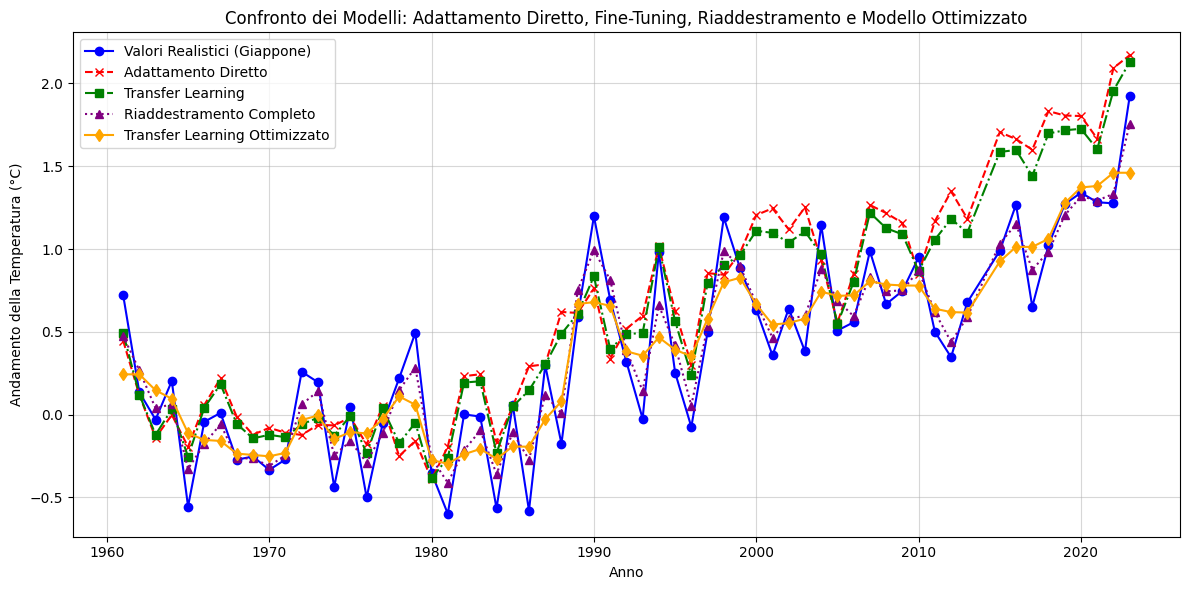

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(giappone_annual_avg['Anno'], y_giappone, label='Valori Realistici (Giappone)', marker='o', linestyle='-', color='blue')
plt.plot(giappone_annual_avg['Anno'], y_pred_direct, label='Adattamento Diretto', marker='x', linestyle='--', color='red')
plt.plot(giappone_annual_avg['Anno'], y_pred_transfer, label='Transfer Learning', marker='s', linestyle='-.', color='green')
plt.plot(giappone_annual_avg['Anno'], y_pred_retrained, label='Riaddestramento Completo', marker='^', linestyle=':', color='purple')
plt.plot(giappone_annual_avg['Anno'], y_pred_optimized, label='Transfer Learning Ottimizzato', marker='d', linestyle='-', color='orange')
plt.xlabel('Anno')
plt.ylabel('Andamento della Temperatura (°C)')
plt.title('Confronto dei Modelli: Adattamento Diretto, Fine-Tuning, Riaddestramento e Modello Ottimizzato')
plt.legend(fontsize=10, loc='upper left')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

Il grafico permette di riassumere ciò che abbiamo notato in precedenza:

* L’**Adattamento Diretto**, rappresentato dalla **linea rossa**, mostra chiaramente i suoi limiti: applicare un modello pre-addestrato senza alcun adattamento non basta a catturare le peculiarità del dataset giapponese, portando a risultati lontani dai valori reali.

* Il **Transfer Learning**, rappresentato dalla **linea verde**, evidenzia un netto miglioramento rispetto all’Adattamento Diretto, avvicinandosi maggiormente ai dati reali, ma non riesce ancora a garantire una precisione ottimale.

* Il **Transfer Learning Ottimizzato**, illustrato dalla **linea gialla**, brilla per il suo equilibrio tra efficienza e prestazioni. Grazie all’ottimizzazione mirata degli iperparametri, riesce a raggiungere una precisione comparabile al **Riaddestramento Completo**, ma sfruttando al meglio il lavoro già fatto e riducendo significativamente lo sforzo necessario.
* Il **Riaddestramento Completo** (**linea viola**) è ovviamente efficace, riuscendo a modellare accuratamente l’andamento dei valori giapponesi, seppur con un costo computazionale più elevato.

**Vantaggio Cumulativo**

Anche qui è interessante valutare il **vantaggio cumulativo**.

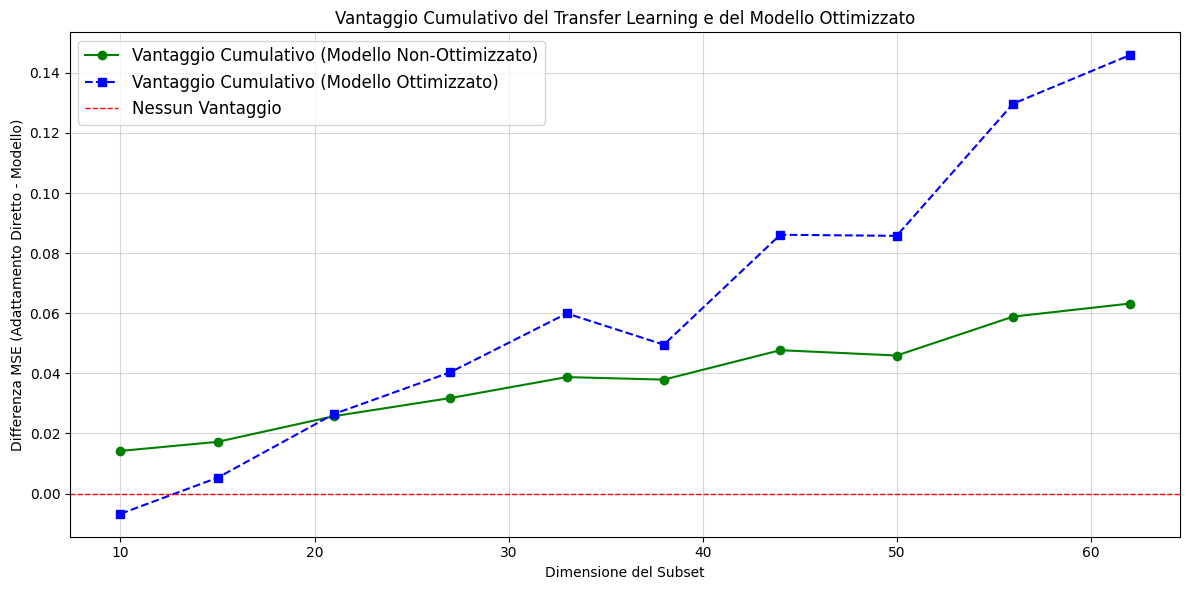

In [56]:
subset_sizes = np.linspace(10, len(X_giappone), num=10, dtype=int)
mse_direct_subsets = []
mse_transfer_subsets = []
mse_optimized_subsets = []

for size in subset_sizes:
    X_subset = X_giappone[:size]
    y_subset = y_giappone[:size]

    y_pred_direct_subset = model_italia_rf.predict(X_subset)
    mse_direct_subsets.append(mean_squared_error(y_subset, y_pred_direct_subset))

    y_pred_transfer_subset = transfer_rf.predict(X_subset)
    mse_transfer_subsets.append(mean_squared_error(y_subset, y_pred_transfer_subset))

    y_pred_optimized_subset = best_model_rf.predict(X_subset)
    mse_optimized_subsets.append(mean_squared_error(y_subset, y_pred_optimized_subset))

cumulative_advantage_transfer = np.array(mse_direct_subsets) - np.array(mse_transfer_subsets)
cumulative_advantage_optimized = np.array(mse_direct_subsets) - np.array(mse_optimized_subsets)


plt.figure(figsize=(12, 6))
plt.plot(subset_sizes, cumulative_advantage_transfer, marker='o', linestyle='-', color='green', label='Vantaggio Cumulativo (Modello Non-Ottimizzato)')
plt.plot(subset_sizes, cumulative_advantage_optimized, marker='s', linestyle='--', color='blue', label='Vantaggio Cumulativo (Modello Ottimizzato)')  # Linea per il modello ottimizzato
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Nessun Vantaggio')
plt.xlabel('Dimensione del Subset')
plt.ylabel('Differenza MSE (Adattamento Diretto - Modello)')
plt.title('Vantaggio Cumulativo del Transfer Learning e del Modello Ottimizzato')
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

Il grafico evidenzia il vantaggio cumulativo del Transfer Learning, sia ottimizzato (**linea blu**) che non (**linea verde**). Quest'ultimo mostra un miglioramento **costante ma limitato**, mentre il modello ottimizzato si distingue con un **vantaggio crescente**, soprattutto con subset più grandi. Questo indica che l’ottimizzazione degli iperparametri permette al modello di adattarsi meglio ai dati giapponesi.

# Conclusioni

Questo progetto ha dimostrato in modo pratico come il **Transfer Learning** possa essere applicato con successo a modelli tradizionali, come la **Regressione Lineare** e il **Random Forest**, per analizzare trend climatici tra due paesi, Italia e Giappone. L’obiettivo era chiaro: **verificare se le conoscenze acquisite da un modello addestrato su un dataset italiano potessero migliorare le previsioni su un dataset giapponese, sfruttando le similarità globali tra i due contesti.**

I risultati evidenziano che il **Transfer Learning 'Diretto'**, pur essendo un approccio intuitivo, non è sufficiente per catturare le peculiarità locali. Tecniche come il **fine-tuning** e l’**ottimizzazione degli iperparametri** hanno invece permesso di adattare i modelli con maggiore precisione, mostrando che il Transfer Learning può non solo migliorare le prestazioni, ma farlo in modo efficiente e con un uso più razionale dei dati disponibili. Interessante è il fatto che, con l’ottimizzazione, si riescano a raggiungere prestazioni comparabili a quelle di un modello riaddestrato da zero, ma con un **costo computazionale ridotto**.

In definitiva, il Transfer Learning si conferma uno strumento utile e versatile, che permette di ottimizzare risorse e migliorare analisi anche in contesti con dati limitati, aprendo la strada a nuove applicazioni in ambito scientifico e tecnologico.